<a href="https://colab.research.google.com/github/javierbmm/handwritting_classification/blob/main/handwritting_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritting Classification

Classification of handwritting numbers (from 0 to 9) using KNN neighbors algorithm, implementing preprocessing, scaling and tuning data techniques:
* **PCA**: Principal component analysis.
* **TruncatedSVD**: Truncated singular value decomposition (aka LSA)

More details on implementation and algorithm explanations throughout this notebook. 

________________________________________________


## Loading main libraries

In [23]:
# -libraries
import numpy
import sklearn
import sklearn.datasets
import sklearn.model_selection
import sklearn.decomposition

# - visualization
import matplotlib.pyplot as plt

## Auxiliar functions

In [24]:
# - Functions
def load_data():
	_digits = sklearn.datasets.load_digits()
	_X = _digits.data
	_Y = _digits.target
	return _digits, _X, _Y


def describe_data(images=False):
	print(digits.DESCR)
	print(X.shape)
	print(Y.shape)
	print(digits.feature_names)
	print(digits.target_names)
	if images:
		plt.gray()
		plt.matshow(digits.images[0])
		plt.show()


def preprocess_data():
	# - Data normalization by zero mean and unit variance
	from sklearn import preprocessing
	_scaler = preprocessing.StandardScaler()
	_x_train_scaled = _scaler.fit_transform(x_train)

	# apply scaling on testing data having into account x_train statistics
	from sklearn.pipeline import make_pipeline
	from sklearn.linear_model import LogisticRegression
	_x_test = _scaler.fit_transform(x_test)
	_model = LogisticRegression()
	_model.fit(_x_train_scaled, y_train)
	_x_test_scaled = _model.predict(_x_test)

	return _x_train_scaled, _x_test_scaled

## Loading data

In [25]:
# - loading data
digits, X, Y = load_data()
describe_data(images=False)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## Splitting data
* 75% Train data.
* 25% Test data.

In [26]:
# - split the data 75% train and 25% test subsets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1347, 64) (450, 64) (1347,) (450,)


## Preprocessing data

In [27]:
# - preprocessing data
x_train_scaled, x_test_scaled = preprocess_data()
print(x_train_scaled, x_test_scaled)

[[ 0.         -0.34658389 -0.67111503 ... -1.15783495 -0.50770266
  -0.19895848]
 [ 0.          5.19793507  2.23828434 ... -0.13881915 -0.26774635
  -0.19895848]
 [ 0.         -0.34658389 -0.25548655 ... -0.81816302 -0.50770266
  -0.19895848]
 ...
 [ 0.         -0.34658389  0.78358465 ...  1.55954051 -0.02779004
  -0.19895848]
 [ 0.         -0.34658389 -0.87892927 ... -1.15783495 -0.50770266
  -0.19895848]
 [ 0.         -0.34658389 -0.87892927 ... -0.98799898 -0.50770266
  -0.19895848]] [6 9 3 7 2 2 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 3 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 9 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 1 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 2 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 5 5 6 6 0 6 4 3 9 3 8 7 2 9 0 4 5 8 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 2 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 1 6 4 5 6 0 3 2 3 6 7 1 9 1 4 7 6 5 8 5 5 1 5 2 8 8 9 9 7

## Dimensionality Reduction: PCA Analysis 

---



In [28]:
from sklearn.decomposition import PCA

# - PCA Analysis
pca = PCA()  # project from 64 to 2 dimensions
pca.fit(x_train_scaled)

PCA()

### PCA explains a part of the variance.

In [29]:
# - the PCA explains a part of the variance.
print(pca.components_)
print(pca.explained_variance_)


[[ 2.45769908e-18 -1.93435053e-01 -2.84584362e-01 ... -1.01977598e-01
  -1.28763282e-01 -7.46025470e-02]
 [-3.86280647e-20  4.58912013e-02  6.48072981e-02 ... -2.24909035e-01
  -1.52595100e-01 -6.59506368e-02]
 [ 2.92546202e-19 -3.32616468e-03  7.63072966e-02 ...  2.51047630e-02
  -8.80176474e-02 -8.08010464e-02]
 ...
 [ 0.00000000e+00 -2.89672775e-16 -6.05869374e-17 ...  3.58220398e-16
   2.77555756e-16 -1.11022302e-16]
 [ 0.00000000e+00 -3.56579139e-17 -2.46493011e-17 ... -2.74519990e-16
   1.30971622e-16 -7.45931095e-17]
 [ 1.00000000e+00  1.87747998e-18  1.53904343e-17 ... -8.02909398e-18
  -6.57781674e-18  4.70297171e-19]]
[7.39473869e+00 5.92231880e+00 5.25229279e+00 3.90746836e+00
 2.97614572e+00 2.64108436e+00 2.41403293e+00 2.07472957e+00
 1.85134308e+00 1.79411347e+00 1.69189093e+00 1.55116122e+00
 1.38886839e+00 1.37402220e+00 1.29237813e+00 1.16323953e+00
 1.07166994e+00 9.85840361e-01 9.70818420e-01 9.23958520e-01
 8.18786025e-01 7.78110384e-01 6.73067143e-01 6.35974128e-0

###  Plotting the cumulative variance to get the number of principal components we need.

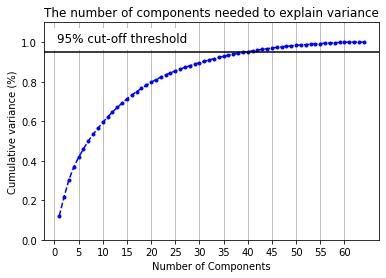

In [123]:
xi = numpy.arange(1, 65, step=1)
y = numpy.cumsum(pca.explained_variance_ratio_)

fig, ax = plt.subplots()
plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker='.', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(numpy.arange(0, 64, step=5))  # change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='black', linestyle='-')
plt.text(0.5, 1.00, '95% cut-off threshold', color='black', fontsize=12,
         backgroundcolor='white')

ax.grid(axis='x')
plt.show()
# We can see how the cut-off threshold crosses with the cumulative variance at 40 number of components.
# Hence, this is the number of principals we need.

## Dimensionality Reduction: SVD Analysis 




In [31]:
from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD(63)
projected_svd = tsvd.fit(x_train_scaled)

### Same analysis as PCA: obtaining the best number of components for SVD.

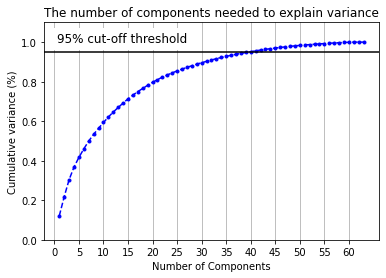

In [122]:
xi = numpy.arange(1, 64, step=1)
y = numpy.cumsum(tsvd.explained_variance_ratio_)

fig, ax = plt.subplots()

plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker='.', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(numpy.arange(0, 64, step=5))  # change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='black', linestyle='-')
plt.text(0.5, 1.00, '95% cut-off threshold', color='black', fontsize=12,
         backgroundcolor='white')

ax.grid(axis='x')
plt.show()
# We can see how the cut-off threshold crosses with the cumulative variance at 40 number of components.
# Hence, this is the number of principals we need.

## Applying a dimension reduction choosing a 95% of variance explained

In [33]:
projected_pca = PCA(40).fit_transform(x_train_scaled)
print("projected pca:", projected_pca)

projected pca: [[ 3.84342510e+00 -4.83794281e-02  3.24945164e-01 ... -7.87700992e-02
   3.09972578e-01  3.75589259e-02]
 [-6.95138937e+00  1.22684091e-03 -1.30460067e+00 ...  6.48018395e-02
   3.85907556e-01  2.57853192e-02]
 [ 2.03729421e+00 -2.36663154e+00  2.93343109e+00 ...  4.12428431e-01
   4.20804558e-01 -6.08236308e-01]
 ...
 [-1.57690257e+00  2.35806588e+00 -5.32194237e-01 ...  8.95120888e-02
  -1.33389396e+00  3.40812426e-01]
 [ 1.75467867e+00  1.77346538e+00 -3.24232996e-01 ...  5.53791880e-01
  -6.00024212e-01  1.03595252e-01]
 [ 2.43082530e-01 -4.00225472e-01 -4.46336927e+00 ...  3.45018121e-03
  -1.22276577e-01  1.34611699e-01]]


In [34]:
projected_svd = TruncatedSVD(39).fit_transform(projected_pca)
print("projected svd:", projected_svd)

projected svd: [[ 3.84342510e+00 -4.83794281e-02  3.24945164e-01 ...  2.16312814e-01
  -7.87700992e-02  3.09972578e-01]
 [-6.95138937e+00  1.22684091e-03 -1.30460067e+00 ... -7.16049555e-01
   6.48018395e-02  3.85907556e-01]
 [ 2.03729421e+00 -2.36663154e+00  2.93343109e+00 ... -3.68934265e-01
   4.12428431e-01  4.20804558e-01]
 ...
 [-1.57690257e+00  2.35806588e+00 -5.32194237e-01 ...  1.03014704e+00
   8.95120888e-02 -1.33389396e+00]
 [ 1.75467867e+00  1.77346538e+00 -3.24232996e-01 ... -4.55976257e-01
   5.53791880e-01 -6.00024212e-01]
 [ 2.43082530e-01 -4.00225472e-01 -4.46336927e+00 ...  1.21026114e-01
   3.45018121e-03 -1.22276577e-01]]


## Find the k optimal value for the k-NN classifier using 10-fold cross-validation

### Creating the model

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

### Creating a dictionary with all the values we want to try
In this case, we will do a 10-fold cross validation.

In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': numpy.arange(1, 10)}

### Using gridsearch to test all values for `n_neighbors`

In [83]:
knn_gscv = GridSearchCV(knn, param_grid, cv=5)


### Fit model to data

In [84]:
knn_gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

### Check best performing `n_neighbors` value (cross-validating)

> Bloc con sangría



In [85]:
print('best params:', knn_gscv.best_params_)

best params: {'n_neighbors': 1}


### Best score output

In [86]:
print('best score:', knn_gscv.best_score_)

best score: 0.9866363761531047


## Training/fitting KNN Classifier 

In [87]:
n_neighbors = knn_gscv.best_params_["n_neighbors"]  # 3 neighbors
clf = KNeighborsClassifier(n_neighbors=n_neighbors)

### Learn the digits from the subset

In [88]:
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Predict digit values from test subset

In [89]:
predicted = clf.predict(x_test)
print(predicted)

[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 3 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 9 7 2 6 9 4 0 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 4 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 1 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 1 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8 8 5 5 1 6 2 8 8 9 5 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 5 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5 6 0 0 3 0 5 0 0 4 1
 2 8 4 5 9 6 3 1 8 8 4 2 3 8 9 8 8 5 0 6 3 3 7 1 6 4 1 2 1 1 6 4 7 4 8 3 4
 0 5 1 9 4 5 7 6 3 7 0 5 9 7 5 9 7 4 2 1 9 0 7 5 8 3 6 3 9 6 9 5 0 1 5 5 8
 3 3 6 2 6 5]


### Testing its correctness/score 

In [90]:
clf.score(x_test,y_test)

0.9822222222222222

## K Neighbours Analysis: different classsifier performances varying the number of `k`

### Varying the number of `k` from 1 to 25

In [92]:
scores_array = []
for i in range(25):
  k = i + 1
  aux_knn = KNeighborsClassifier(n_neighbors=k)
  aux_knn.fit(x_train, y_train)
  score = aux_knn.score(x_test, y_test)
  scores_array.append(score)

print(scores_array)

[0.9822222222222222, 0.9844444444444445, 0.9866666666666667, 0.9866666666666667, 0.9933333333333333, 0.9955555555555555, 0.9933333333333333, 0.9888888888888889, 0.9866666666666667, 0.9866666666666667, 0.98, 0.98, 0.98, 0.9822222222222222, 0.98, 0.9777777777777777, 0.98, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.98, 0.9777777777777777, 0.9755555555555555, 0.9733333333333334]


## Plotting the results

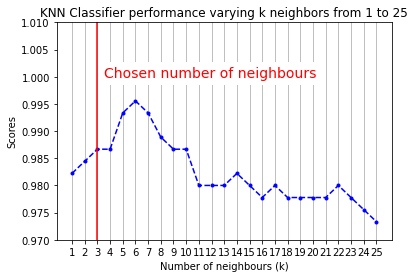

In [115]:
xi = numpy.arange(1, 26, step=1)
y = scores_array

fig, ax = plt.subplots()
plt.ylim(0.97, 1.01)
plt.plot(xi, y, marker='.', linestyle='--', color='b')

plt.xlabel('Number of neighbours (k)')
plt.xticks(numpy.arange(1, 26, step=1))  
plt.ylabel('Scores')
plt.title('KNN Classifier performance varying k neighbors from 1 to 25')

plt.axvline(x=3, color='r', linestyle='-')
plt.text(3.5, 1, 'Chosen number of neighbours', color='red', fontsize=14, 
         backgroundcolor='white')
ax.grid(axis='x')
plt.show()

## References

https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/

https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://etav.github.io/python/scikit_pca.html

https://analyticsindiamag.com/beginners-guide-to-truncated-svd-for-dimensionality-reduction/

_Javier Merida\
Barcelona. December, 2021_